In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
# Consider only 5000 samples 
label_0 = df[df['sentiment']=='positive'].sample(2500)
label_1 = df[df['sentiment']=='negative'].sample(2500)

data = pd.concat([label_0, label_1])

In [7]:
data.head()

,review,sentiment
28849,Rumour has it that around the time that ABBA ...,positive
21207,"At your video store, you might find this gem.<...",positive
528,"""Night of the Living Homeless"" was a fairly st...",positive
25987,"One of the better made for TV biopics, I just ...",positive
18645,This film is an hour or so of good entertainme...,positive


In [8]:
data.shape

(5000, 2)

In [9]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,review,sentiment
5727,Liv Tyler. Liv Tyler. Liv Tyler. Yeah it's har...,positive
27077,Expecting a combination of scifi and period fi...,negative
48593,Johnny Knoxville and the boys of Jackass go ov...,positive
17881,I viewed the movie for a second time on Septem...,positive
35925,On this site I've often lambasted the American...,negative


In [10]:
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
### saving the text files to avoid computing again again

positive = ''
negative = ''

# Check if the processed strings are already saved
try:
    with open('positive.txt', 'r') as positive_file:
        positive = positive_file.read()
    with open('negative.txt', 'r') as negative_file:
        negative = negative_file.read()
        
except FileNotFoundError:
    # If files are not found, process the data and save the strings
    for val in data[data['sentiment'] == 'positive'].review:
        text = val.lower()
        tokens = nltk.word_tokenize(text)
        for word in tokens:
            positive = positive + word + ' '

    for val in data[data['sentiment'] == 'negative'].review:
        text = val.lower()
        tokens = nltk.word_tokenize(text)
        for word in tokens:
            negative = negative + word + ' '
    
    # Save the processed strings
    with open('positive.txt', 'w') as positive_file:
        positive_file.write(positive)
    with open('negative.txt', 'w') as negative_file:
        negative_file.write(negative)



### this is without saving the text files. 


# positive = ''
# negative = ''

# for val in data[data['sentiment']=='positive'].review:
#     text = val.lower()
#     tokens = nltk.word_tokenize(text)
#     for word in tokens:
#         positive = positive + word + ' '
        
        
# for val in data[data['sentiment']=='negative'].review:
#     text = val.lower()
#     tokens = nltk.word_tokenize(text)
#     for word in tokens:
#         negative = negative + word + ' '
        
        

In [12]:
len(positive)

3429434

In [13]:
len(negative)

3292140

In [14]:
positive[:100]

"liv tyler . liv tyler . liv tyler . yeah it 's hard to keep your mind off this fetching beauty ( giv"

In [15]:
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

stopwords = set(STOP_WORDS)

positive_wordcloud = WordCloud(width=500, height=300, stopwords = stopwords, background_color="grey").generate(positive)
negative_wordcloud = WordCloud(width=500, height=300, stopwords = stopwords, background_color="grey").generate(negative)

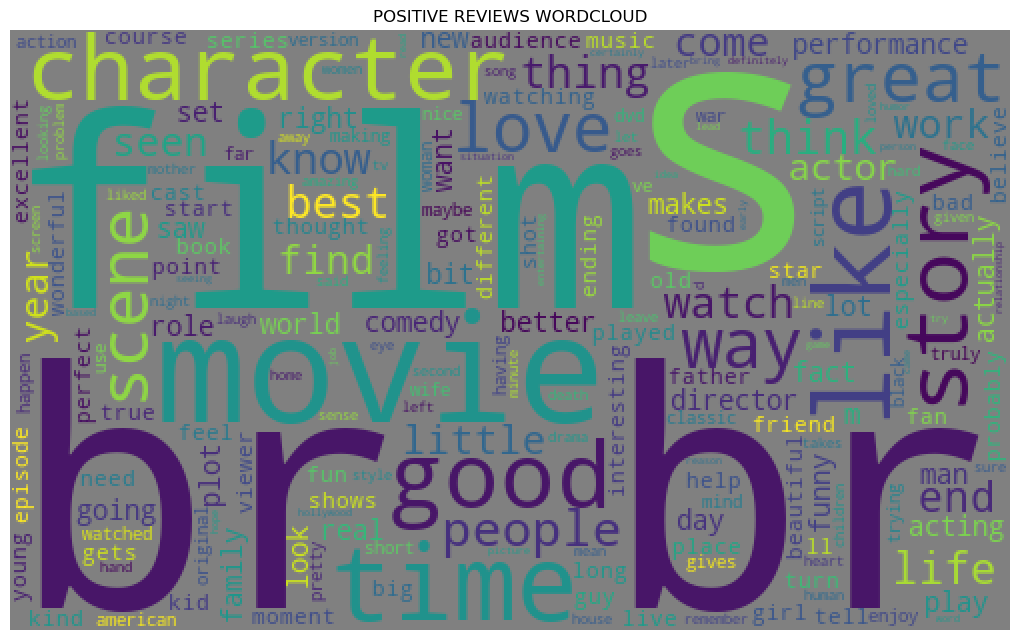

In [16]:
plt.figure(figsize=(10,8), facecolor = 'w')
plt.imshow(positive_wordcloud)
plt.title('POSITIVE REVIEWS WORDCLOUD')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

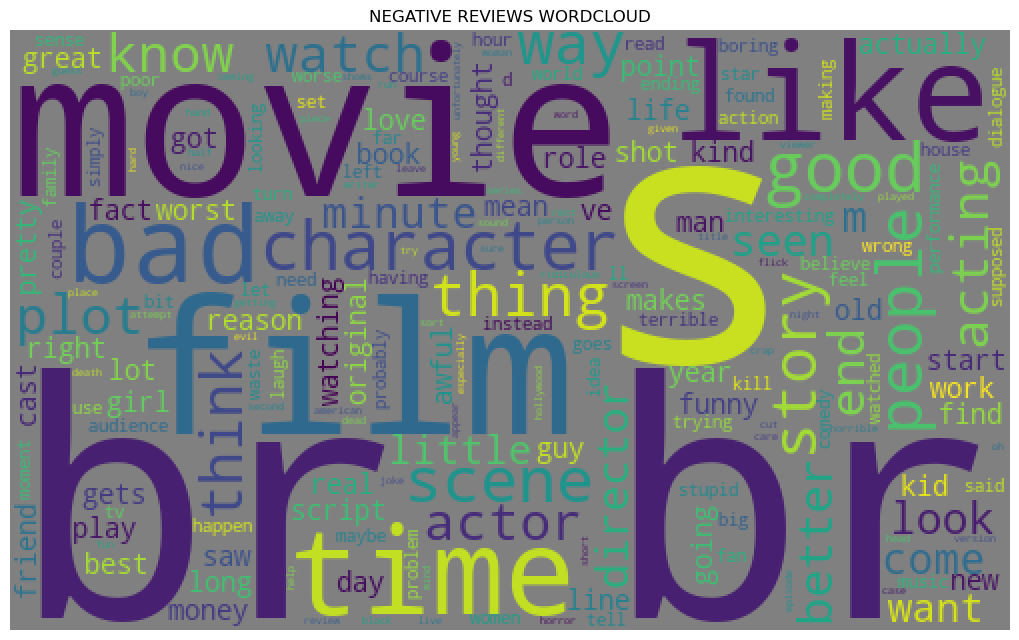

In [17]:
plt.figure(figsize=(10,8), facecolor = 'w')
plt.imshow(negative_wordcloud)
plt.title('NEGATIVE REVIEWS WORDCLOUD')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [18]:
stopwords.add("br")
stopwords.add("S")
stopwords.add("film")
stopwords.add("movie")
positive_wordcloud = WordCloud(width=500, height=300, stopwords = stopwords, background_color="grey").generate(positive)
negative_wordcloud = WordCloud(width=500, height=300, stopwords = stopwords, background_color="grey").generate(negative)

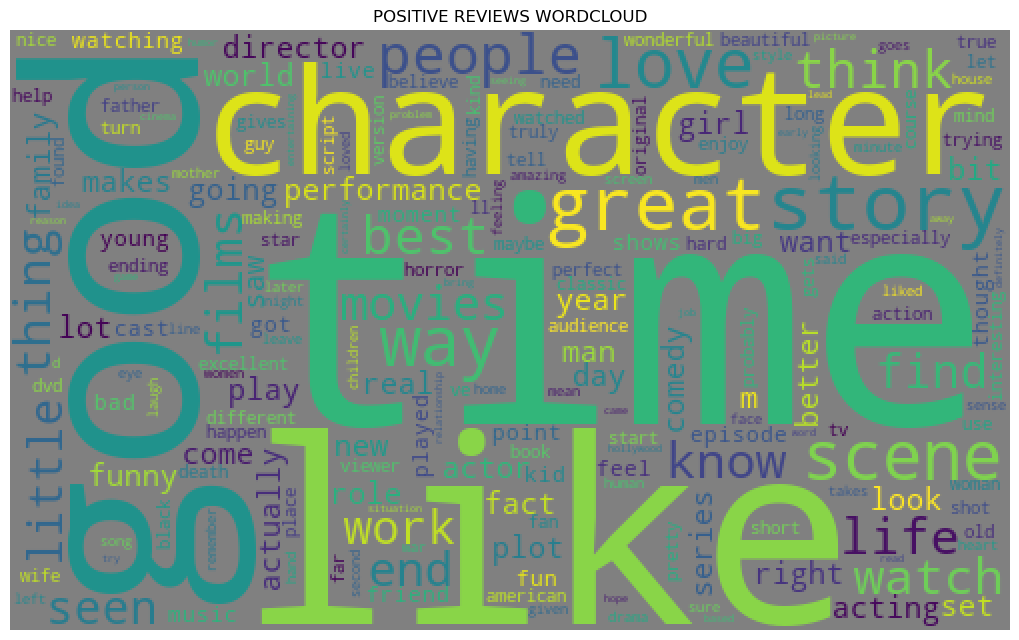

In [19]:
plt.figure(figsize=(10,8), facecolor = 'w')
plt.imshow(positive_wordcloud)
plt.title('POSITIVE REVIEWS WORDCLOUD')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

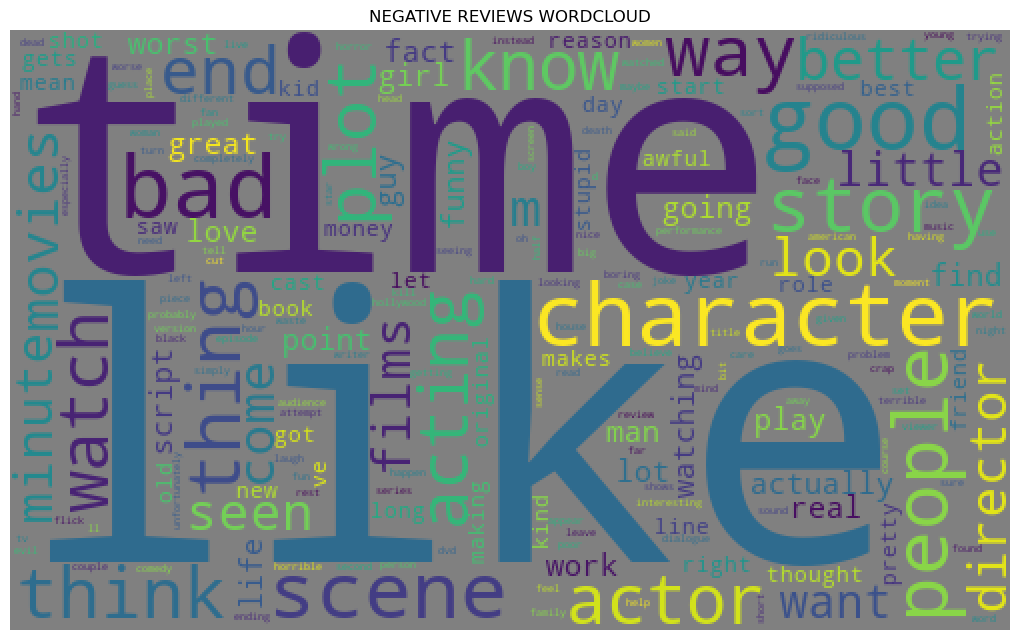

In [20]:
plt.figure(figsize=(10,8), facecolor = 'w')
plt.imshow(negative_wordcloud)
plt.title('NEGATIVE REVIEWS WORDCLOUD')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [21]:
# Custom transformer using spaCy
# creating custom transformer for code reusability .
from sklearn.base import TransformerMixin

class Predictors(TransformerMixin):
    
    # transform_params can be used only when more parameters to be sent to the prebuilt Transformer
    def transform(self, X, **transform_params):
        
        #cleaning text
        return [clean_text(text) for text in X]

    # for compatibility
    def fit(self, X, y=None, **fit_params):
        return self
    
    def get_params(self, deep=True):
        return {}
    
def clean_text(text):
    
    return text.strip().lower()
        

In [22]:
# spaCy is a opensource library provides pretrained tools for NLP 
# create an object of 'en_core_web_sm'  model ( English language )

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# nlp = en_core_web_sm.load()

stopwords = list(STOP_WORDS)
print(stopwords)

['behind', 'down', 'when', 'at', 'whoever', 'has', 'never', 'often', 'herself', '’s', 'moreover', 'whence', 'in', 'which', 'noone', 'empty', 'front', 'of', 'if', 'toward', 'beside', '’d', 'mostly', '’ll', 'nothing', 'hereupon', 'must', 'their', 'say', 'former', 'could', 'n’t', 'whereas', 'without', 'within', 'had', 'ten', 'they', 'ever', 'together', 'no', 'doing', 'seem', 'bottom', 'off', 'seems', 'cannot', 'even', 'elsewhere', 'formerly', 'us', 'not', 'hereby', 'any', "'ve", 'did', 'anyone', 'under', 'out', 'full', 'my', 'done', 'through', 'became', 'please', 'besides', 'everything', 'forty', 'throughout', 'would', 'make', 'or', 'the', 'and', 'more', 'towards', 'several', 'twelve', 'get', 'various', 'seeming', 'except', 'on', 'sometime', 'becoming', 'keep', 'really', 'everyone', 'him', 'during', 'name', 'neither', 'it', 'become', 'almost', '’m', 'what', 'might', 'every', 'perhaps', 'whose', 'enough', 'all', 'indeed', 'onto', 'before', 'hereafter', 'i', 'hers', 'anything', 'thru', 'som

In [23]:
import string
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
# defining a tokenizer

def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
            
        else:
            temp = token.lower_
        tokens.append(temp)
        
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
            
    return cleaned_tokens

In [25]:
text_data_cleaning("   Hello how is your day! Did you like my project ?   ")

['hello', 'day', 'like', 'project']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

CountVectorizer : Vectorize each sentence ( document ) into a vector. 
Say the no.of unique words present in whole dataset ( collection of all documents ) is n. 
For each document, a vector of size n is generated where number at each position represents the frequency of that particular word. 

TfidfVectorizer : Similar to CountVectorizer but the values are not just frequencies but are calculated by computational formulae.

tfidf --> Term Frequency and Inverse Document Frequency

TransformerMixin : A class used to create a custom Transformer inheriting which all the methods like fit, transform will be available.

Transformer : The object which performs transformations on data such as cleaning, feature extraction, or normalization.

Pipeline : A sequence of data preprocessing and modelling steps. Helpful in streamlining and automating process of transformation and model training

In [27]:
# bow --> bag of words

bow_vector = CountVectorizer(tokenizer = text_data_cleaning, ngram_range=(1,1))


n_gram : All possible sequences containing n words

sample = "This is an NLP Project"

uni-grams : ['This', 'is', 'an', 'NLP', 'Project' ]

bi-grams  : ['This is', 'is an', 'an NLP', 'NLP Project']


In [28]:
type(bow_vector)

sklearn.feature_extraction.text.CountVectorizer

In [29]:
bow_vector

CountVectorizer(tokenizer=<function text_data_cleaning at 0x7e6c1b3879a0>)

In [30]:
tfidf_vector = TfidfVectorizer(tokenizer=text_data_cleaning, min_df = 1)

min_df : Minimum Frequency of word to be considered for the vectorization

min_df = 1 (default): The word should appear in alteast one of the documents 

min_df = 2 : The word should appear in atleast two of the documents to be considered in vocabulary for vectorization

In [31]:
from sklearn.model_selection import train_test_split

X = data['review']
ylabels = data['sentiment']
X_train , X_test, y_train, y_test = train_test_split(X, ylabels, test_size = 0.3)

In [32]:
X_train.shape, X_test.shape, X.shape

((3500,), (1500,), (5000,))

In [33]:
ylabels[:5]

5727     positive
27077    negative
48593    positive
17881    positive
35925    negative
Name: sentiment, dtype: object

In [34]:
y_train[:5]

11715    positive
31142    negative
15048    negative
7818     positive
16573    positive
Name: sentiment, dtype: object

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import joblib
import os

classifier = RandomForestClassifier(n_estimators = 100, n_jobs = -1)

pipe_bow = Pipeline([("cleaner", Predictors()), ('bow', bow_vector), ('clf', classifier)])

saved_model_path = "pipe_bow_model.pkl"

if os.path.exists(saved_model_path):
    pipe_bow = joblib.load(saved_model_path)
    print("model loaded from :", saved_model_path)
    
else:
    pipe_bow.fit(X_train,y_train)
    joblib.dump(pipe_bow, saved_model_path)
    print("Model trained and saved at : ", saved_model_path)


Model trained and saved at :  pipe_bow_model.pkl


In [36]:
# pipe_bow = joblib.load('pipe_bow_model.pkl')
y_pred_bow = pipe_bow.predict(X_test)

In [37]:
y_pred_bow[:5]

array(['positive', 'negative', 'positive', 'positive', 'positive'],
      dtype=object)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, y_pred_bow))

              precision    recall  f1-score   support

    negative       0.83      0.80      0.81       733
    positive       0.81      0.84      0.83       767

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500



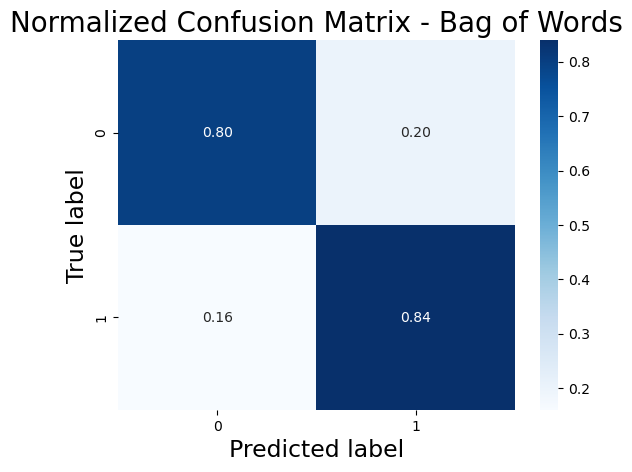

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix
confusion_matrix_bow = confusion_matrix(y_test, y_pred_bow)

# Normalize the confusion matrix
confusion_matrix_bow = confusion_matrix_bow.astype('float') / confusion_matrix_bow.sum(axis=1)[:, np.newaxis]

# Create a heatmap using Seaborn
conf = sns.heatmap(confusion_matrix_bow, annot=True, cmap='Blues', fmt='.2f')

# Set labels and title
plt.ylabel('True label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)
plt.title('Normalized Confusion Matrix - Bag of Words', fontsize=20)

plt.show()


## Model TF-IDF

In [40]:

pipe_tfidf = Pipeline([("cleaner", Predictors()), ('tfidf', tfidf_vector), ('clf', classifier)])
saved_model_path = "pipe_tfdif_model.pkl"

# if os.path.exists(saved_model_path):
#     os.remove(saved_model_path)

if os.path.exists(saved_model_path):
    pipe_tfidf = joblib.load(saved_model_path)
    print("model loaded from :",saved_model_path)
    
else:
    pipe_tfidf.fit(X_train,y_train)
    joblib.dump(pipe_tfidf, saved_model_path)
    print("Model trained and saved at : ", saved_model_path)

Model trained and saved at :  pipe_tfdif_model.pkl


In [41]:
y_pred_tfidf = pipe_tfidf.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred_tfidf))

              precision    recall  f1-score   support

    negative       0.81      0.84      0.82       733
    positive       0.84      0.81      0.82       767

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500



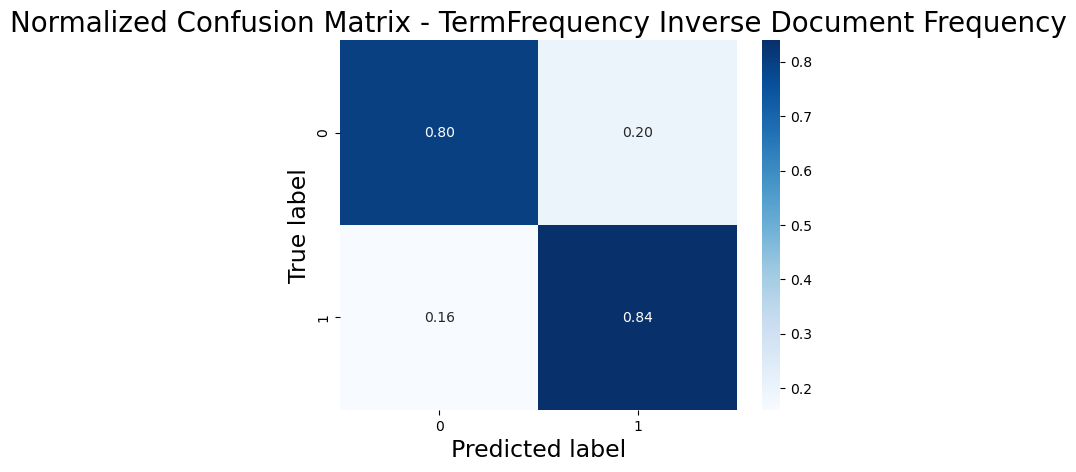

In [43]:
confusion_matrix_bow = confusion_matrix(y_test, y_pred_bow)

# Normalize the confusion matrix
confusion_matrix_bow = confusion_matrix_bow.astype('float') / confusion_matrix_bow.sum(axis=1)[:, np.newaxis]

# Create a heatmap using Seaborn
conf = sns.heatmap(confusion_matrix_bow, annot=True, cmap='Blues', fmt='.2f')

# Set labels and title
plt.ylabel('True label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)
plt.title('Normalized Confusion Matrix - TermFrequency Inverse Document Frequency', fontsize=20)
plt.show()


# Bidirectional LSTM

In [44]:
from keras.datasets import imdb
import pickle

In [45]:
# vocabulary_size = 10000
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
# print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

In [46]:
X = df['review']
y = df['sentiment']
X.shape, y.shape

((50000,), (50000,))

In [47]:
y = y.replace({"positive":0, "negative":1})

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [49]:
X_train[4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

In [50]:
X_train.shape, X_test.shape

((35000,), (15000,))

In [57]:
X_train[6]

"I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I grew up on black and white TV and Seahunt with Gunsmoke were my hero's every week.You have my vote for a comeback of a new sea hunt.We need a change of pace in TV and this would work for a world of under water adventure.Oh by the way thank you for an outlet like this to view many viewpoints about TV and the many movies.So any ole way I believe I've got what I wanna say.Would be nice to read some more plus points about sea hunt.If my rhymes would be 10 lines would you let me submit,or leave me out to be in doubt and have me to quit,If this is so then I must go so lets do it."

In [58]:
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences

vocabulary_size = 10000
# Create a tokenizer and fit it on the training data
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(X_train)

# Convert words to integer sequences using the tokenizer
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
max_words = 500
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_words)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_words)

# Now X_train_padded and X_test_padded are the sequences of integer indices suitable for the LSTM model


In [59]:
X_train_sequences[0][:5]

[46, 200, 137, 203, 8]

In [60]:
len(X_train_padded[6])

500

In [61]:
v = [1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 2, 5940, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 9363, 1117, 1831, 7485, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 8564, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 7175, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 5390, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
len(v)

123

In [62]:
from keras.models import Sequential, load_model
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPool1D
embedding_size=32

# model=Sequential()
# model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
# model.add(LSTM(100))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
# model.add(Dropout(0.5, input_shape = (256,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.1, input_shape = (128,)))
model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(0.1, input_shape = (64,)))
model.add(Dense(1, activation = 'sigmoid'))


print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 500, 256)         164864    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [63]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [64]:
batch_size = 64
num_epochs = 10

In [65]:
X_valid, y_valid = X_train_padded[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train_padded[batch_size:], y_train[batch_size:]

In [66]:
X_train2[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [67]:
len(X_train2), len(X_valid)

(34936, 64)

In [68]:
history = []
model_path = "model_blstm.pkl"

if os.path.exists(model_path):
    history = joblib.load(model_path)["history"]
    model = load_model(model_path)
    print("Model loaded from:", model_path)
else:
    history = model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs).history
    model.save(model_path)
    print("Model trained and saved at:", model_path)

# Access the training history
print(history)


Epoch 1/10
546/546 [==============================] - 116s 189ms/step - loss: 0.4151 - accuracy: 0.7918 - val_loss: 0.2605 - val_accuracy: 0.8906
Epoch 2/10
546/546 [==============================] - 55s 101ms/step - loss: 0.2263 - accuracy: 0.9116 - val_loss: 0.2076 - val_accuracy: 0.9375
Epoch 3/10
546/546 [==============================] - 41s 75ms/step - loss: 0.1703 - accuracy: 0.9372 - val_loss: 0.1853 - val_accuracy: 0.9062
Epoch 4/10
546/546 [==============================] - 36s 65ms/step - loss: 0.1400 - accuracy: 0.9497 - val_loss: 0.1708 - val_accuracy: 0.9375
Epoch 5/10
546/546 [==============================] - 31s 57ms/step - loss: 0.1052 - accuracy: 0.9629 - val_loss: 0.1837 - val_accuracy: 0.9375
Epoch 6/10
546/546 [==============================] - 31s 56ms/step - loss: 0.0758 - accuracy: 0.9747 - val_loss: 0.1141 - val_accuracy: 0.9688
Epoch 7/10
546/546 [==============================] - 31s 56ms/step - loss: 0.0601 - accuracy: 0.9791 - val_loss: 0.1574 - val_accura

In [74]:
y_pred_blsm = model.predict(X_test_padded)

469/469 [==============================] - 9s 18ms/step


In [78]:
type(y_pred_blsm)

numpy.ndarray

In [81]:
y_pred_blsm = [ 1 if  y > 0.5 else 0 for y in y_pred_blsm ]

In [85]:
y_pred_blsm[:5], y_test[:5]

([1, 0, 1, 1, 0],
 24675    1
 17444    0
 12267    1
 6847     1
 9031     1
 Name: sentiment, dtype: int64)

In [107]:
conf_matrix.sum(axis = 1)

array([7484, 7516])

Text(0.5, 1.0, 'Confusion matrix for BLSTM model')

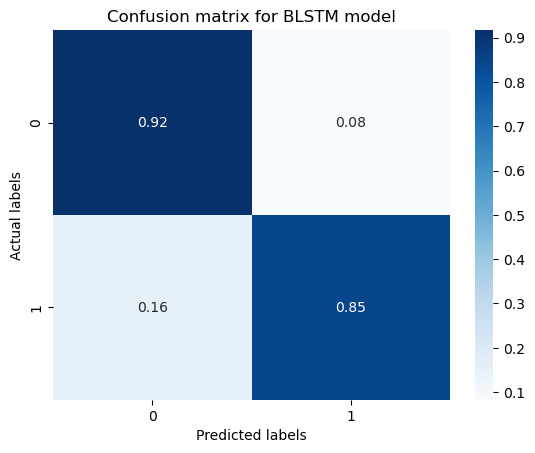

In [115]:
conf_matrix = confusion_matrix(y_test, y_pred_blsm)
conf_matrix = conf_matrix / conf_matrix.sum(axis = 1)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", cmap = 'Blues')
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion matrix for BLSTM model")


In [88]:
accuracy_score(y_test, y_pred_blsm)

0.881